<a href="https://colab.research.google.com/github/sydney-machine-learning/sentimentanalysis-USelections/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/US_Poli_dataset.csv")
print (df.shape)
df.head()

(2514, 10)


,Name,Twitter_username,Account_start_time,Account_ID,Sex,Birthplace,Birthday,Age,Instagram_username,Political_party
0,A. Donald McEachin,RepMcEachin,2017-01-03T00:00:00Z,816181091673448448,male,Germany,1961-10-10T00:00:00Z,59.0,repmceachin,Democratic Party
1,Aaron Michlewitz,RepMichlewitz,2010-06-27T00:00:00Z,160246973,male,United States of America,1978-01-01T00:00:00Z,42.0,NaN,Democratic Party
2,Aaron Peskin,AaronPeskin,2010-11-13T00:00:00Z,215369273,male,United States of America,1964-06-17T00:00:00Z,56.0,apeskin52,Democratic Party
3,Aaron Peña,AaronPena,2007-10-31T00:00:00Z,9843332,male,United States of America,1959-06-08T00:00:00Z,61.0,NaN,Republican Party
4,Aaron Schock,aaronschock,2009-03-12T00:00:00Z,23951197,male,United States of America,1981-05-28T00:00:00Z,39.0,aaronschock,Republican Party


In [4]:
df.drop(columns=['Twitter_username', 'Account_start_time', 'Account_ID', 'Birthday'], inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

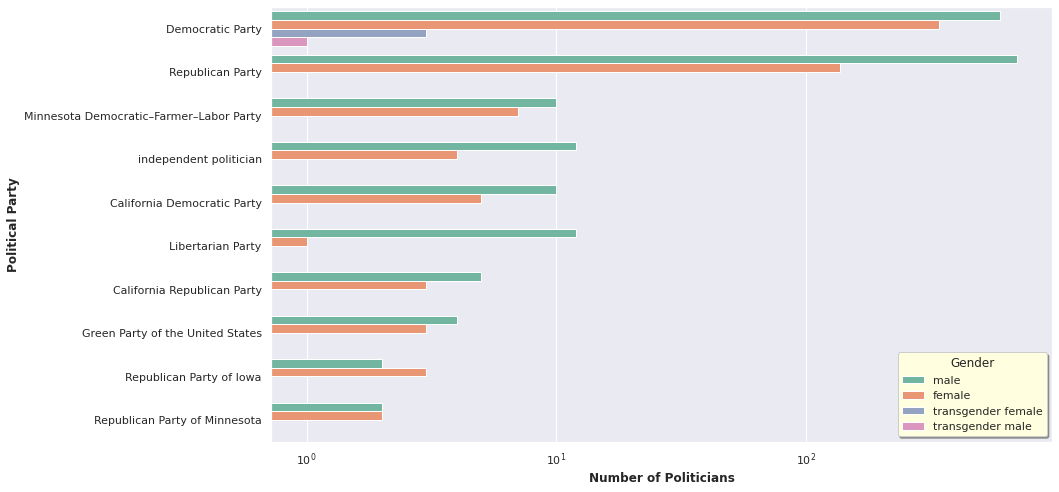

In [7]:
df_temp = df.drop_duplicates(subset=['Name', 'Political_party'])
plt.figure(figsize=(14,8))
sns.set(style='darkgrid')
sns.countplot(y='Political_party', hue='Sex', data=df_temp, order=df_temp['Political_party'].value_counts().index[:10], palette="Set2")
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel("Number of Politicians", weight='bold')
plt.ylabel("Political Party", weight='bold')
plt.legend(title='Gender', shadow=True, facecolor='lightyellow')
plt.show()

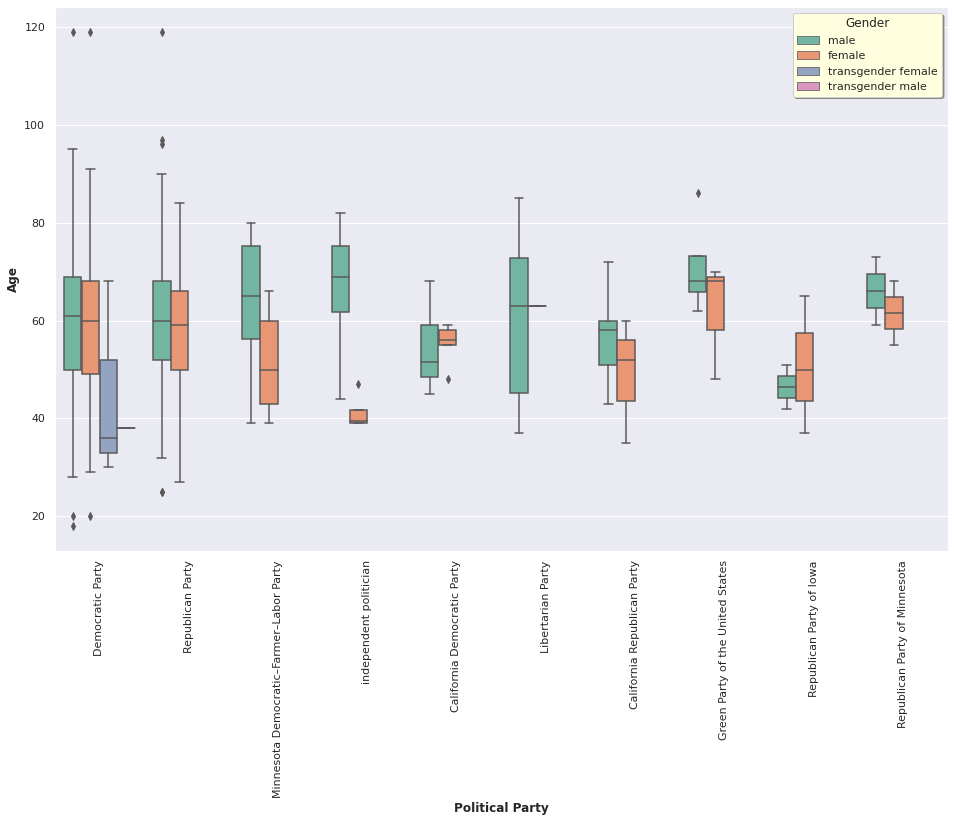

In [8]:
df_temp = df.drop_duplicates(subset=['Name', 'Political_party'])
plt.figure(figsize=(16,10))
sns.set(style='darkgrid')
sns.boxplot(hue="Sex", y='Age', x='Political_party', data=df_temp, order=df_temp['Political_party'].value_counts().index[:10], palette="Set2")
plt.xticks(rotation=90)
plt.xlabel("Political Party", weight='bold')
plt.ylabel("Age", weight='bold')
plt.legend(title='Gender', shadow=True, facecolor='lightyellow')
plt.show()


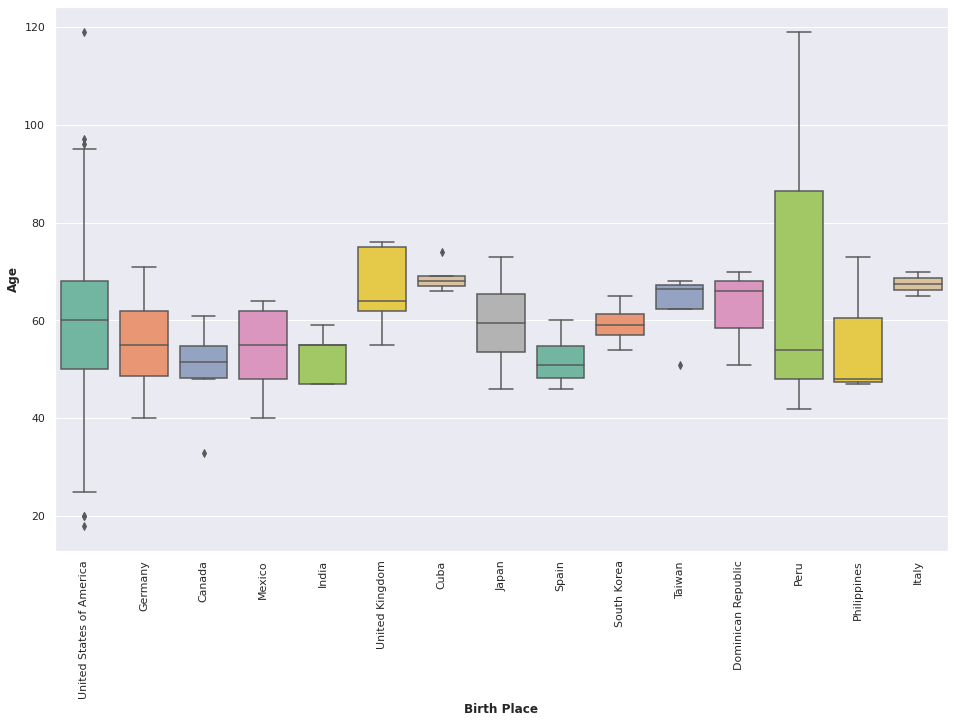

In [9]:
df_temp = df.drop_duplicates(subset=['Name'])
plt.figure(figsize=(16,10))
sns.set(style='darkgrid')
sns.boxplot(y='Age', x='Birthplace', data=df_temp, order=df_temp['Birthplace'].value_counts().index[:15], palette="Set2")
plt.xticks(rotation=90)
plt.xlabel("Birth Place", weight='bold')
plt.ylabel("Age", weight='bold')
plt.show()

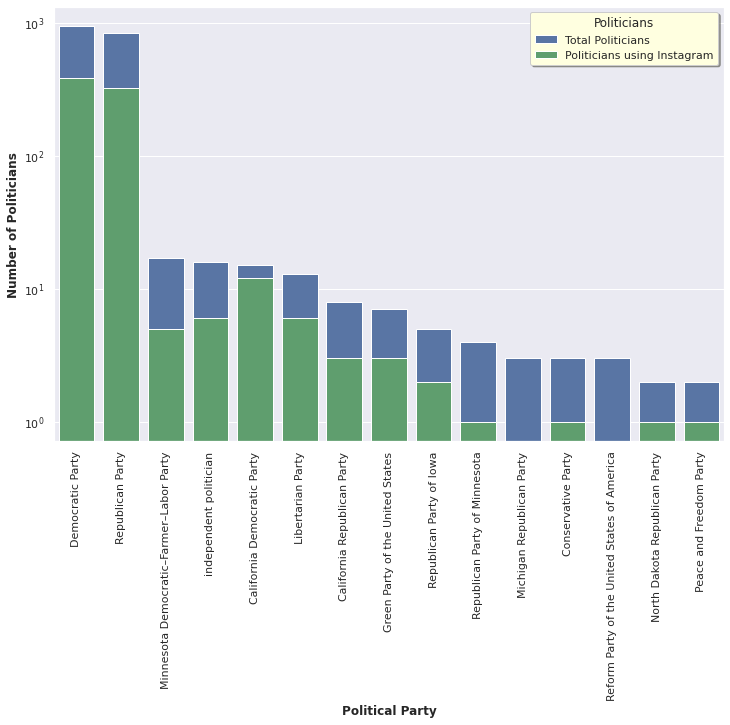

In [10]:
df_temp = df.groupby('Political_party')[['Name', 'Instagram_username']].nunique().sort_values(by='Name', ascending=False).head(15)
df_temp.reset_index(inplace=True)
sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
sns.barplot(x='Political_party', y='Name', data=df_temp, color='b', label='Total Politicians')
sns.barplot(x='Political_party', y='Instagram_username', data=df_temp, color='g', label='Politicians using Instagram')
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Political Party', weight='bold')
plt.ylabel('Number of Politicians', weight='bold')
plt.legend(title='Politicians', shadow=True, facecolor='lightyellow')
plt.show()

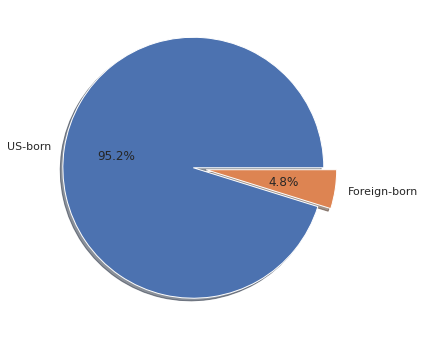

In [11]:
from collections import Counter
df_temp = df.drop_duplicates(subset=['Name'])
dict_ = {}
dict_['US-born'] = df_temp[(df_temp['Birthplace'] == 'United States of America')].shape[0]
dict_['Foreign-born'] = df_temp[~(df_temp['Birthplace'] == 'United States of America')].shape[0]

plt.figure(figsize=(6,6))
plt.pie(x=dict_.values(), labels=dict_.keys(), autopct='%1.1f%%', shadow=True, 
        startangle=0, explode = [0.1, 0])
plt.show()